# Assignment 3

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

from numpy.random import randint
from skimage import io
from ipywidgets import interact
from matplotlib.patches import Ellipse

# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

## Generate Random Data

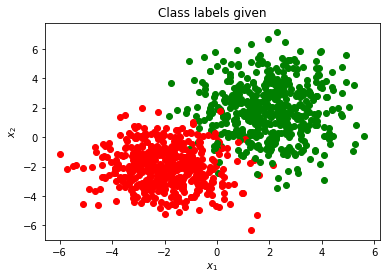

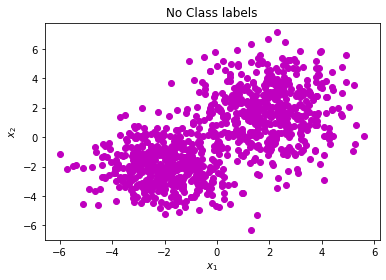

(2, 1000)


Text(0.5, 1.0, 'Data and Classes')

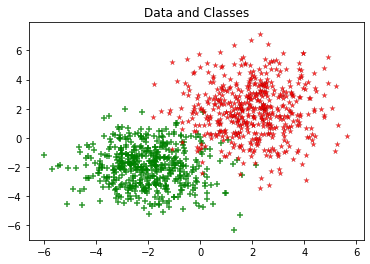

In [3]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data
print(X.shape)

colors = ['green', 'red']
lw = 0.1
markers = ['+','*']

plt.figure()
for color, i, marker in zip(colors, [0, 1], markers):
    plt.scatter(X[0, y == i], X[1, y == i], marker=marker, alpha=.8, color=color, linewidths = lw, edgecolors = 'black')
plt.title('Data and Classes')

## K-means

Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.

**Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

In [4]:
class kmeans:
    """
    K-MEANS CLASS AND FUNCTIONS
    """
    def fiterate(self, X, k): #X.shape = (d,N); k = int(num of classes)
        """
        J = sumN{ sumk{ tnj*|xn-uj|^2 } }
        
        uj = sumN{tnj*xn}/sumN{tnj}
        
        """
        colors = ['green', 'red']
        lw = 0.1
        markers = ['+','*']
        
        
        self.k = k
        self.X = X
        self.dim = X.shape[0]
        self.N = X.shape[1]
        self.t = np.zeros(shape =(self.N,)) 
        self.u = np.zeros(shape = (self.dim, self.k))
        #tt = np.zeros(shape =(self.N,)) 
        
        ns = np.array(range(0,self.N))
        init = np.random.choice(ns, size = (self.k,), replace = False)
        un = np.zeros(shape = (self.dim, self.k))
        
        J = np.zeros(shape = (self.N, k))
        
        for i in range(0, self.k):
            un[:,i] = X[:,init[i]]
        
        #print(un)
        check = np.ones(shape = (self.dim, self.k))+0.1

        while (np.sum(check)):
            self.u = un.copy()
            
            for n in ns:
                for j in range(0,self.k):
                    J[n,j] = ( np.linalg.norm(X[:,n] - self.u[:,j]) )**2
                self.t[n] = (np.where(J[n,:] == J[n,:].min()))[0][0]
            
            for j in range(0,self.k):
                for d in range(0, self.dim):
                    un[d,j] = np.sum(X[d, self.t == j])/np.sum(self.t == j)
                    
            check = np.abs(self.u-un)        
        """ 
        print("J of cluster 0: ", np.sum(J[:,0]))
        print("J of cluster 1: ", np.sum(J[:,1]))
        
        colors = ['green', 'red', 'blue', 'orange']
        lw = 0.1
        markers = ['+','*','+','*']
        
        plt.figure()
        for color, i, marker in zip(colors, range(0,self.k), markers):
            plt.scatter(X[0, self.t == i], X[1, self.t == i], marker=marker, alpha=.8, color=color, linewidths = lw, edgecolors = 'black')
            plt.scatter(self.u[0,i], self.u[1,i], marker = 'o', color = 'black', linewidths = 2, edgecolors = 'black' )
        plt.title('Data and Classes')
        """   
        return self.u, self.t
    
    
    def gauss_est(self,):
        """
        pi_j = Nj/N

        mu_j = 
   
        cv_j = covar(X[])
        """
        mu = self.u.copy()
        pi = np.zeros(shape = (self.k,))
        cv = np.zeros(shape = (self.k, self.dim, self.dim))
        
        for j in range(0, self.k):
            pi[j] = np.sum(self.t == j)/self.N
            cv[j,:,:] = np.cov(self.X[:, self.t == j])
           
        return pi, mu, cv

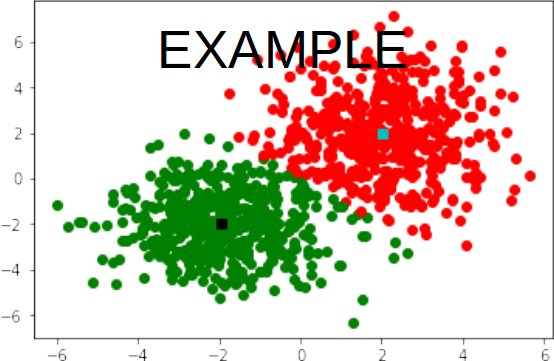

In [5]:
display(Image(filename='./kmeans.jpg'))

In [6]:

km = kmeans()
u,y = km.fiterate(X,2)
p,u,S = km.gauss_est()

print(p)
print(u)
print(S)

[0.491 0.509]
[[ 2.0212828  -1.94876553]
 [ 1.99647112 -1.9852701 ]]
[[[ 1.74625851 -0.12365964]
  [-0.12365964  3.04936668]]

 [[ 1.77396971 -0.1500055 ]
  [-0.1500055   1.87105841]]]


$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

## GMM

Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.

**Use your newly created function to cluster the above generated data set. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

In [7]:
import scipy as sp
from conf import confidence_ellipse as ce
class Gauss_Mix_Model:
    """
    GMM CLASS AND FUNCTIONS
    """
    
    def fiterate(self, X, k): #X.shape = (d,N); k = int(num of classes)
        """
        1) Iniialize pi,mu,cv w/ kmeans
        
        2) Expectation:      gamma(z_nj) = pi_j*gaussian(x_n|mu_j, cv_j) / i_sum2_k{ pi_i*gaussian(x_n|mu_i, cv_i) }
        
        3) Maximization:     mu_j' = (1/N_j)*n_sum2_N{ gamma(znj)*x_n }
                             cv_j' = (1/N_j)*n_sum2_N{ gamma(znj)*(x_n-mu_j)(x_n-mu_j).T } 
                             pi_j' = N_j/N
                             N_j = n_sum2_N{ gamma(z_nj) }
        
        4) Log-Likelihood:   ln(p(X|pi,mu,cv))  = n_sum2_N{ ln{  i_sum2_k{ pi_i*gaussian(x_n|mu_i, cv_i) } } }   
        
        5) Reiterate until convergence
        """
        self.k = k
        self.X = X
        self.dim = X.shape[0]
        self.N = X.shape[1]
        
        self.Ns = np.array(range(0,self.N))
        self.ks = np.array(range(0,self.k))
        
        self.ll = np.zeros(shape = (self.N, self.k)) 
        Y = np.zeros(shape = (self.N, self.k))
        
        init = kmeans()
        self.y = init.fiterate(X,k)
        Ni = np.zeros(shape = (self.k,))
        
        self.pi, self.mu, self.cv = km.gauss_est()
        loglike = 0
        print("Initial pis = ",self.pi)
        print("Initial means = ",self.mu)
        print("Initial cov.s = ",self.cv)
        print("* * * * * * * * * * * * * * * * *")
        check_pi = np.ones(shape = (self.k,))+0.1
        check_mu = np.ones(shape = (self.dim, self.k))+0.1
        check_cv = np.ones(shape = (self.k, self.dim, self.dim))+0.1
        cnt= 0
        
        while (np.sum(check_pi)>1e-2) or (np.sum(check_mu)>1e-2) or (np.sum(check_cv)>1e-2):
            cnt += 1
            print("Iteration #",cnt)
            
            p = self.pi.copy()
            u = self.mu.copy()
            S = self.cv.copy()
            L = loglike
            #E_STEP
            self.Y = self.gamma()
            #print("gamma = ")
            #print(Y)
            Ni = np.sum(self.Y, axis = 0)
            
            #M_STEP: N_j; pi_j, mu_j; cv_j 
            for j in self.ks:
                #print("N",j," = ")
                #print(Ni[j])
                """pi_j' = N_j/N"""
                self.pi[j] = Ni[j]/self.N
                
                """mu_j' = (1/N_j)*n_sum2_N{ gamma(znj)*x_n }"""
                t1 = np.zeros((self.dim,))
                for n in self.Ns:   
                    t1 += self.Y[n,j]*X[:,n]
                self.mu[:,j] = t1/Ni[j]
                
                """cv_j' = (1/N_j)*n_sum2_N{ gamma(znj)*(x_n-mu_j)(x_n-mu_j).T } """
                t2 = np.zeros((self.N, self.dim, self.dim))
                for n in self.Ns:
                    Dstar = X[:,n]-self.mu[:,j]
                    t2[n,:,:]  = self.Y[n,j]*np.outer(Dstar, Dstar)
                self.cv[j,:,:] = np.sum(t2, axis = 0)/Ni[j]
                #print("Cov",j," = ")
                #print(self.cv[j,:,:])
            
            loglike = self.log_likelihood()
            check_pi = np.abs(self.pi-p)
            check_mu = np.abs(self.mu-u)
            check_cv = np.abs(self.cv-S)
            check_ll = loglike-L
        self.predict()
            #if check_ll < 0:
                #print("ERROR")
            #print(L)
            #print(loglike)
            #print("* * * * * * * * * * * * * * * * *")
        
        
        return self.pi, self.mu, self.cv

    def inv(self, m):#try with funtion below to invert singular matrix
        a, b = m.shape
        if a != b:
            raise ValueError("Only square matrices are invertible.")

        i = np.eye(a, a)
        return np.linalg.lstsq(m, i)[0]
    
    
    def gaussian(self, x, u, S): #I don't trust this function
        """
        (1/|2*pi*S|^1/2)*exp{ (-1/2)*(x-u).T*(S^-1)*(x-u) }
        """
            
        den = (np.linalg.norm(2*np.pi*S))**(0.5)
        diff = x-u
        exp_in = (-1/2)*(diff.T).dot( diff.dot( np.linalg.inv(S) ) )
        gauss = (1/den)*np.exp(exp_in)
        return gauss
    
        
    def gamma(self, ):
        """
        gamma(z_nj) = pi_j*gaussian(x_n|mu_j, cv_j) / i_sum2_k{ pi_i*gaussian(x_n|mu_i, cv_i) }
        """
        Yg = np.zeros(shape = (self.N, self.k)) 
        
        for n in range(0,self.N):
            for i in range(0,self.k):
                self.ll[n,i] = self.pi[i]*sp.stats.multivariate_normal(mean = self.mu[:,i], cov = self.cv[i,:,:]).pdf(self.X[:,n])
                #self.ll[n,i] = self.pi[i]*self.gaussian(self.X[:,n], self.mu[:,i], self.cv[i,:,:])
            Yg[n,:] = self.ll[n,:]/np.sum(self.ll[n,:])
            
        return Yg
    
    def log_likelihood(self,):
        """ln(p(X|pi,mu,cv))  = n_sum2_N{ ln{  i_sum2_k{ pi_i*gaussian(x_n|mu_i, cv_i) } } }"""
        return np.sum(np.log(np.sum(self.ll, axis = 1)))
    
    def predict(self, ):
        y = np.zeros((self.N,))
        for n in range(0,self.N):
            y[n] = (np.where(self.Y[n,:] == self.Y[n,:].max()))[0][0]
         
        plt.figure()
        fig, axs  = plt.subplots()
        for i, color in zip(range(0,self.k), colors):
            for n in self.Ns:    
                if(y[n] == i):
                    plt.scatter(X[0, n], X[1, n], color=[self.Y[n,1], self.Y[n,0], 0, 0.3*self.Y[n,i]] , linewidths = lw, edgecolors = color, )
            ce.confidence_ellipse(X[0, y==i],X[1,y==i], cov = self.cv[i,:,:], ax = axs, n_std = 2.0,edgecolor=color)
        plt.show()

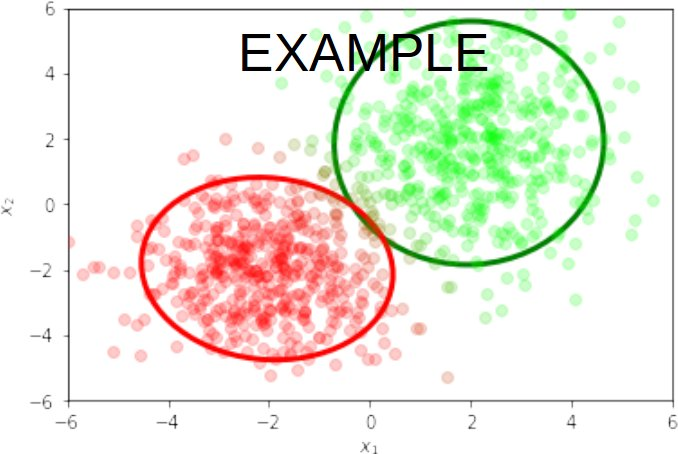

In [8]:
display(Image(filename='./gmm.jpg'))

Initial pis =  [0.491 0.509]
Initial means =  [[ 2.0212828  -1.94876553]
 [ 1.99647112 -1.9852701 ]]
Initial cov.s =  [[[ 1.74625851 -0.12365964]
  [-0.12365964  3.04936668]]

 [[ 1.77396971 -0.1500055 ]
  [-0.1500055   1.87105841]]]
* * * * * * * * * * * * * * * * *
Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13


<Figure size 432x288 with 0 Axes>

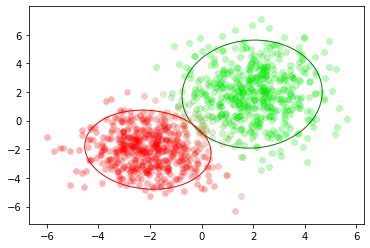

[[ 1.94385351 -2.06656177]
 [ 1.82297843 -2.00147445]]


<function print>

In [9]:
gmm = Gauss_Mix_Model()
r,m,C = gmm.fiterate(X,2)

print(m)

print

# Perform K-means on an image

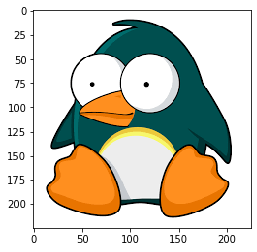

(225, 225, 4)
(50625, 4)
(50625,)
[0 1]
[[111.8090081   98.49848178  48.4916498  255.        ]
 [251.45731411 251.5345213  250.084497   255.        ]]
[ 48  98 111 250 251 255]
(225, 225, 4)


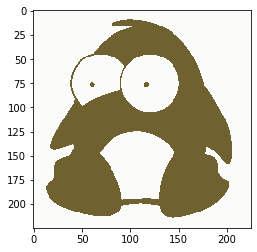

In [10]:
im = io.imread('./cartoon.png')
plt.imshow(im/np.max(im))
plt.show()

print(im.shape)
X = im.reshape(-1, 4)
print(X.shape)


clf = KMeans(n_clusters=2, max_iter=1000, tol=1e-5)
labels = clf.fit_predict(X)
clusters = clf.cluster_centers_


print(labels.shape)
print(np.unique(labels))
print(clusters)

data = np.zeros((225,225,4)).astype(np.uint8)
for i in range(0,225):
    for j in range(0,225):
        data[i,j,:] = clusters[labels[225*i+j]]

print(np.unique(data))
print(data.shape)
plt.imshow(data)
plt.show()


## Clustering of colors

Note that the colors in the image above are clustered around only a few colors. **You need to find the clusters using the k-means algorithm in scikit-learn. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

*Note:* Before you produce the plot using plt.imshow(), make sure the image data is op type "unint8", i.e. set dtype = "uint8"

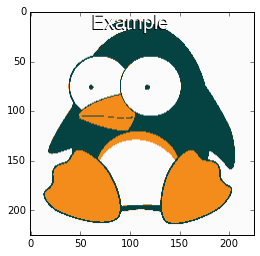

In [11]:
display(Image(filename='./wm_cartoon_repro.png'))

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [12]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [13]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

10


## Inspect the different digit  images

In [14]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


interactive(children=(IntSlider(value=0, description='k', max=1796), Output()), _dom_classes=('widget-interact…

## GMM

Next, fit the data to a 10 component GMM model, using the scikit-learn package.

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

(1797, 64)
(10, 64)
(10, 8, 8)


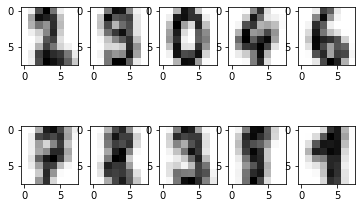

In [15]:
data = digits.data
print(data.shape)
np.random.seed(1)
# Insert GMM code
GMM?
clf = GMM(n_components=10)
clf.fit(data)
means = clf.means_
covs = clf.covariances_
print(means.shape)
im_means = means.reshape((10, 8, -1))
print(im_means.shape)
f, axarr = plt.subplots(2,5)
index = 0
for n in range(0, 2):
    for m in range(0, 5):
        axarr[n, m].imshow(im_means[index, :, :], cmap=cm.binary)
        index += 1


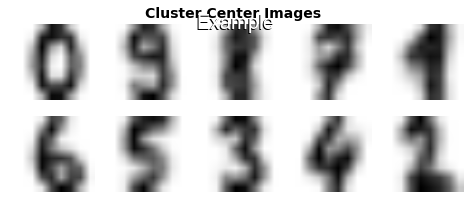

In [16]:
display(Image(filename='./wm_GMM.png'))

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

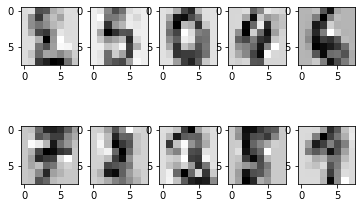

In [17]:
samples = np.zeros(means.shape)
sp.stats.multivariate_normal.rvs?

for n in range(0, means.shape[0]):
    samples[n] = sp.stats.multivariate_normal.rvs(mean=means[n, :], cov=covs[n, :, :], size=1)

    
im_samples = samples.reshape((10, 8, -1))
f, axarr = plt.subplots(2,5)
index = 0
for n in range(0, 2):
    for m in range(0, 5):
        axarr[n, m].imshow(im_samples[index, :, :], cmap=cm.binary)
        index += 1

In [18]:
def gaussian(x, u, S): #I don't trust this function
    """
    (1/|2*pi*S|^1/2)*exp{ (-1/2)*(x-u).T*(S^-1)*(x-u) }
    """

    den = (np.linalg.norm(2*np.pi*S))**(0.5)
    diff = x-u
    exp_in = (-1/2)*(diff**2)*(1/S)
    gauss = (1/den)*np.exp(exp_in)
    return gauss

def predict(x):
    pi = np.array([0.6, 0.4])
    mc = np.array([ [2, 4],[3, 9] ])
    
    
    print(mc[0])
    Yg = np.zeros(shape = (1, 2)) 
    ll = np.zeros(shape = (1, 2)) 
    for n in range(0,1):
        for i in range(0,2):
            #ll[n,i] = pi[i]*sp.stats.multivariate_normal(mean = mc[i,0], cov = mc[i,1]).pdf(x)
            ll[n,i] = gaussian(x, mc[i,0], mc[i,1])
        Yg[n,:] = ll[n,:]/np.sum(ll[n,:])
    print(Yg)

In [19]:
x = np.array([5])
predict(x)

[2 4]
[[0.37817241 0.62182759]]


In [20]:
import numpy as np
X = np.array([[1.9,4],[2,6.8]])

u = np.array([1,1])

y = np.array([1, 0.7])

"N_j = n_sum2_N{ gamma(z_nj) }"
Ni = np.sum(y)
print(Ni)

cv = np.zeros(shape = (2, 2), dtype = np.float64)
"""cv_j' = (1/N_j)*n_sum2_N{ gamma(znj)*(x_n-mu_j)(x_n-mu_j).T } """
t2 = np.zeros(shape = (2, 2, 2), dtype = np.float64)
for n in range(0,2):
    Dstar = X[:,n]-u
    print(Dstar)
    t2[n,:,:]  = np.outer(Dstar, Dstar)
    print(t2)
    t2[n,:,:] *= y[n]
    print(t2)
    
cv = np.sum(t2, axis = 0)
cv /= Ni

print(cv)

1.7
[0.9 1. ]
[[[0.81 0.9 ]
  [0.9  1.  ]]

 [[0.   0.  ]
  [0.   0.  ]]]
[[[0.81 0.9 ]
  [0.9  1.  ]]

 [[0.   0.  ]
  [0.   0.  ]]]
[3.  5.8]
[[[ 0.81  0.9 ]
  [ 0.9   1.  ]]

 [[ 9.   17.4 ]
  [17.4  33.64]]]
[[[ 0.81   0.9  ]
  [ 0.9    1.   ]]

 [[ 6.3   12.18 ]
  [12.18  23.548]]]
[[ 4.18235294  7.69411765]
 [ 7.69411765 14.44      ]]


In [1]:
'''
Computes responsibilities. Assumes one-dimensional data and a k component mixture model.

@param p: mixture coeffecients.
@type p: 1-dimensional real valued list of length k.

@param u: class means.
@type u: 1-dimensional real valued list of length k.

@param s: class standard deviations.
@type s: 1-dimensional real valued list of length k. 

@param x: vector of scalar observations
@type x: 1-dimensional real valued list of length n.

@param c: class label
@type c: an integer in the range [0, k-1]

@return: the calculated responsibility of each observation associated with class c
@rtype: 1-dimensional real valued list of size n
'''


def estimate_gamma(p,u,s,x,c):
    import math
    from math import exp
    from math import sqrt
    
    #You may assume that x will not be empty and that the user will provide valid inputs.
    
    g = [None]*len(x) #responsibilities
    ll = [None]*len(x)*len(u)
    #MISSING CODE COMES HERE
    total = [None]*len(x)
    
    for n in range(0,len(x)):
        total[n]= 0
        for i in range(0,len(u)): 
            ll[n+i*len(x)]= 0
            
            ss= s[i]**2
            den = sqrt(2*math.pi*ss)
            
            diff = x[n]-u[i]
            exp_in = (-1/2)*(diff**2)*(1/ss)
            gauss = (1/den)*exp(exp_in)

            ll[n+i*len(x)] = p[i]*gauss
            total[n] += ll[n+i*len(x)]
            

    for n in range(0,len(x)): 
        g[n] = ll[n+c*len(x)]/total[n]
    return g

In [22]:
gam = estimate_gamma([0.4,0.6],[0,1],[1,1],[-1,1,1.2],0)

print(gam)

[0.7492347090660089, 0.28792871203468484, 0.24871729890449476]


In [23]:
gam = estimate_gamma([0.3,0.7],[0,1],[2,1.5],[-3,1,5.2],1)
print(gam)

[0.2149105740556661, 0.7790226533104514, 0.644506955977054]


In [24]:
gam = estimate_gamma([0.6,0.4],[2,3],[2,3],[5,1,3],1)
print(gam)

[0.5229457618359588, 0.287378054221988, 0.3349390275911855]


In [2]:
gam = estimate_gamma([0.6,0.4],[2,3],[2,3],[5],0)
print(gam)

[0.4770542381640413]


In [28]:
x= np.array([0,2])

print(np.outer(x,x))

[[0 0]
 [0 4]]
